## 5.1 A Complete ML Pipeline Tutorial (ACU ~ 86%)

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2021.10.25 </div>
<div style="text-align: right\"> Last update: 2021.10.25</div>

- 출처 : https://www.kaggle.com/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

In [3]:
from IPython.display import display

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

In [4]:
import os
print(os.listdir('data/diabetes'))

['diabetes.csv']


**컬럼 정보**  
1. Number of times pregnant  

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  

3. Diastolic blood pressure (mm Hg)  

4. Triceps skin fold thickness (mm)  

5. 2-Hour serum insulin (mu U/ml)  

6. Body mass index (weight in kg/(height in m)^2)  

7. Diabetes pedigree function  

8. Age (years)  

9. Class variable (0 or 1)  

In [5]:
SEED = 7  
np.random.seed(SEED)

In [6]:
df = pd.read_csv('data/diabetes/diabetes.csv')
df_name = df.columns

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


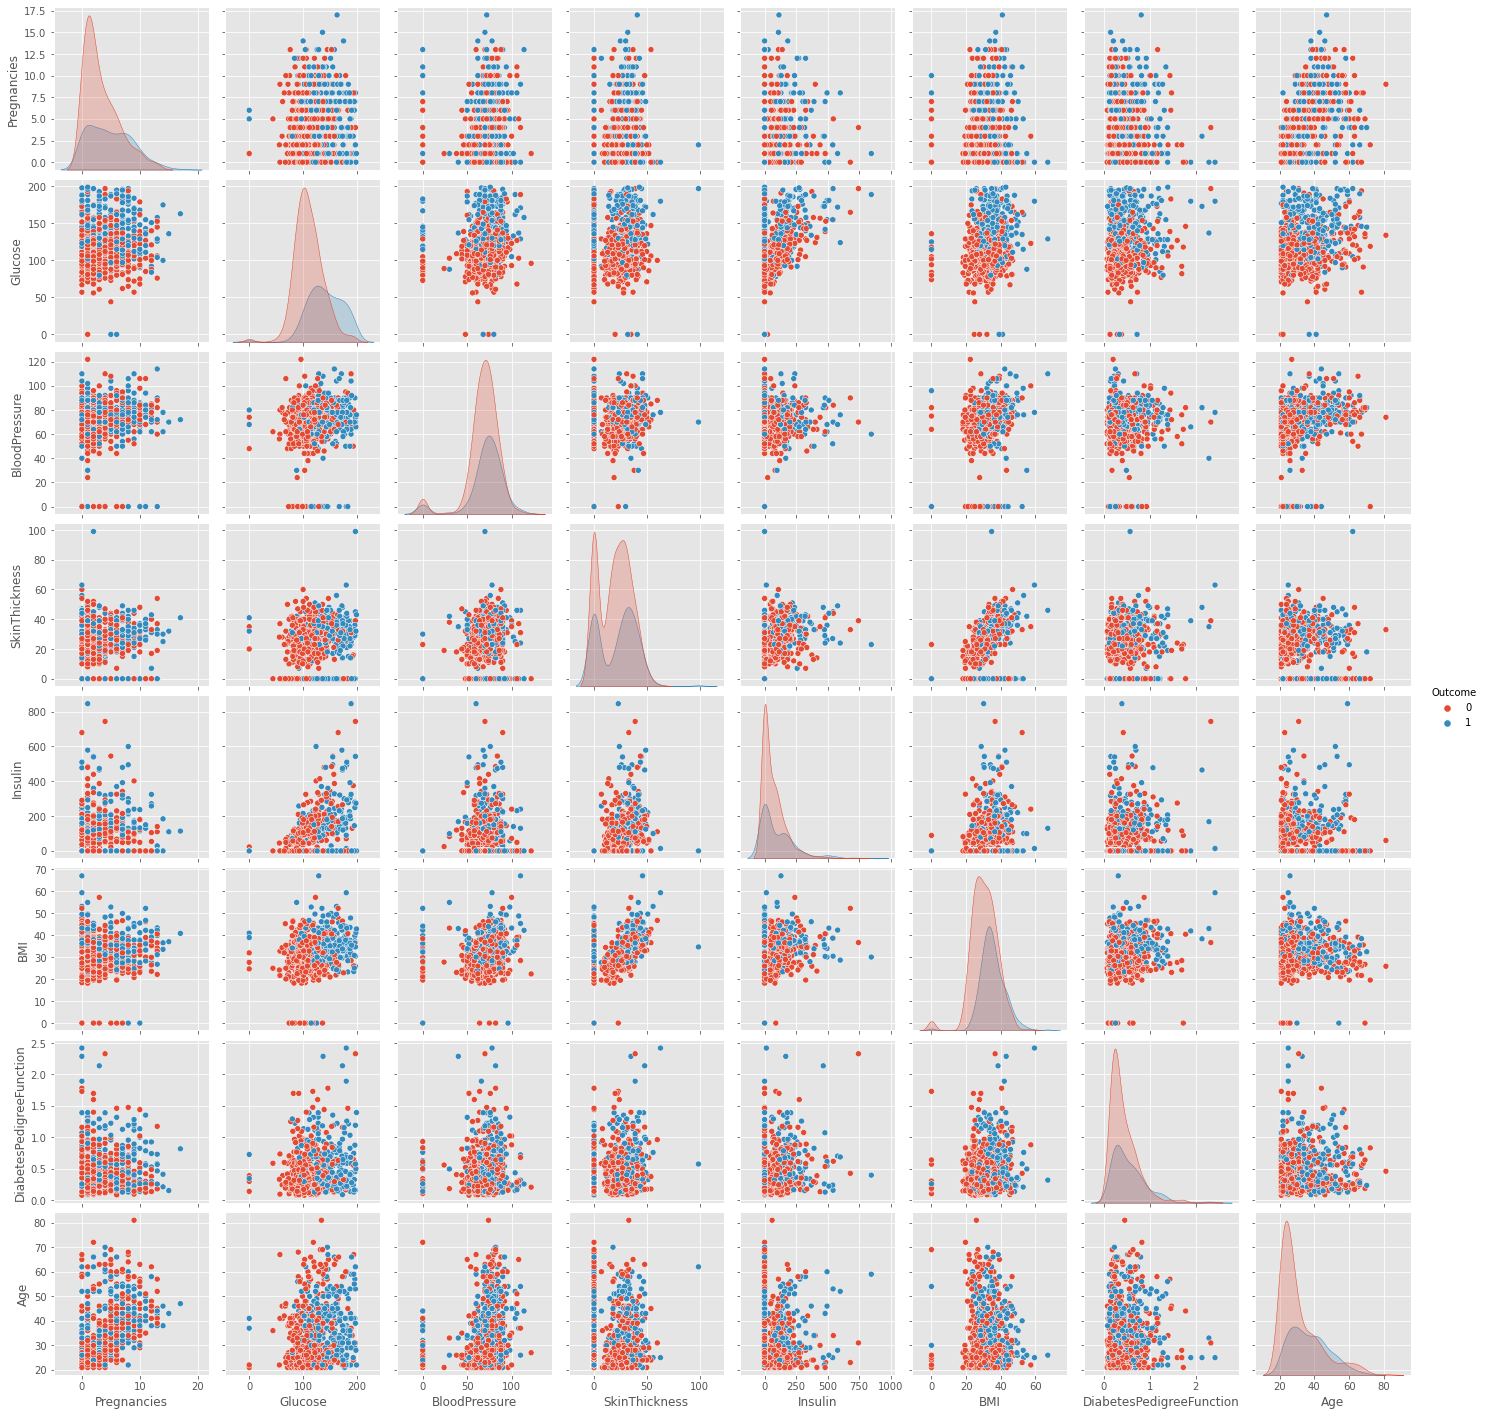

In [11]:
g = sns.pairplot(df, hue = 'Outcome')

- outlier가 많아보임

In [12]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = .5

    trace1 = go.Histogram(
        x=data_array,
        histnorm='count',
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min()-1,
            end=df[nameOfFeature].max()+1,
            size=binsize
        )
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

In [13]:
def plotHist(df,feature, bins = 20):
    fig, ax = plt.subplots(figsize = (12, 6))
    df[feature].hist(bins = bins, ax = ax)
    plt.title('The distribution of {0}'.format(feature))
    plt.show()

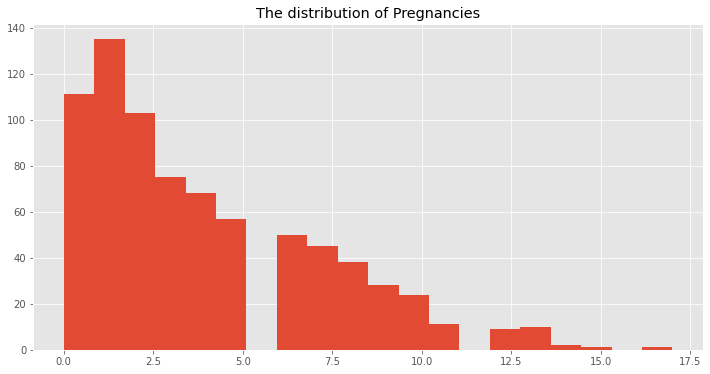

In [14]:
plotHist(df, 'Pregnancies')

- 임신 17회는 이상해 보인다.(outlier)

이제 outcome(정상, 당뇨)에 따른 각 피처의 분포를 살펴보자.

A fundamental task in many statistical analyses is to characterize the location and variability of a data set. A further characterization of the data includes skewness and kurtosis.

**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case

In [15]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    
    
    
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

In [16]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target, bins = 20):
    fig, ax = plt.subplots(figsize = (12, 6))
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]
    
    x0.hist(bins = bins, ax = ax, alpha = 0.7, label ='trace0')
    x1.hist(bins = bins, ax = ax, alpha = 0.7, label ='trace1')
    plt.title('The distribution of {0}'.format(feature))
    plt.legend()
    plt.show()
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

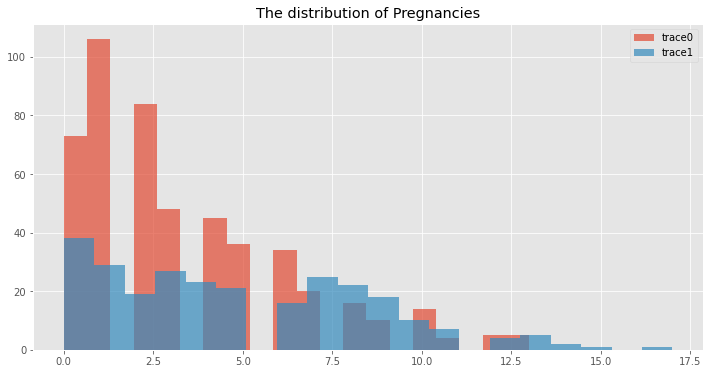

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [17]:
plotBarCat(df, df_name[0], 'Outcome')

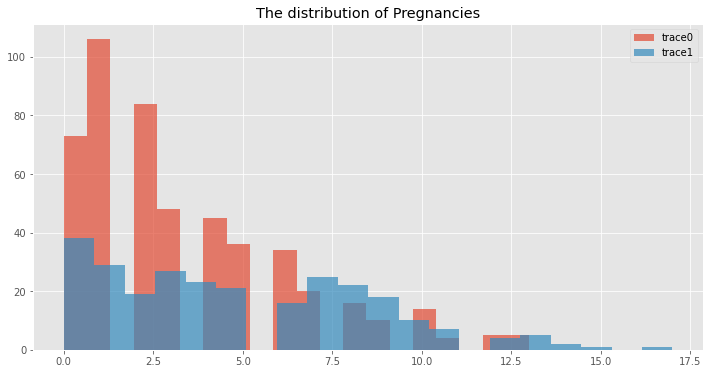

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


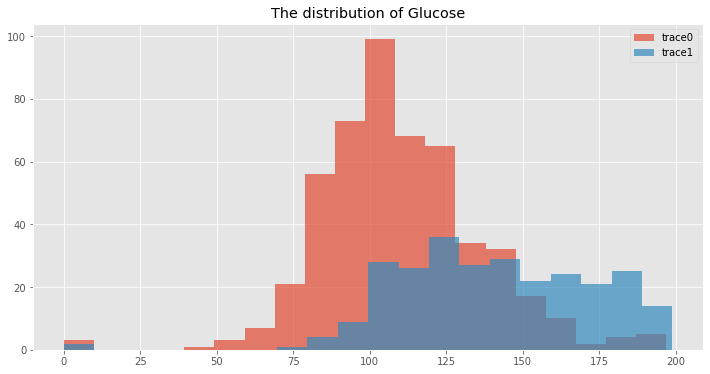

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


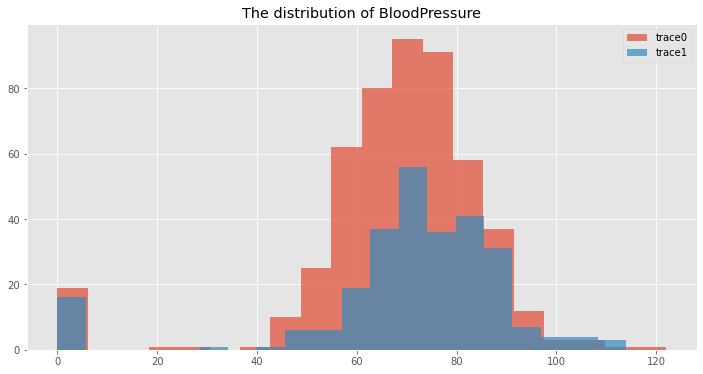

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


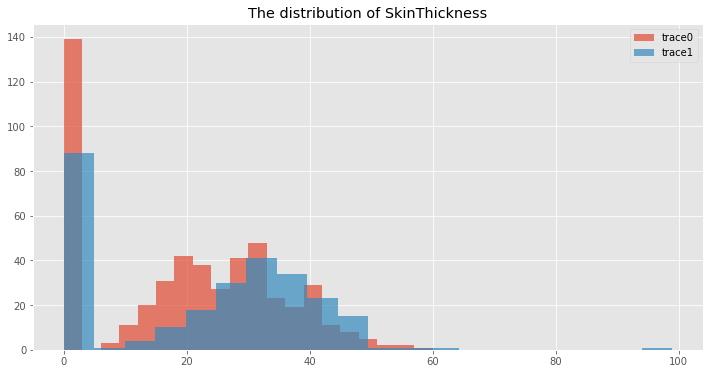

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


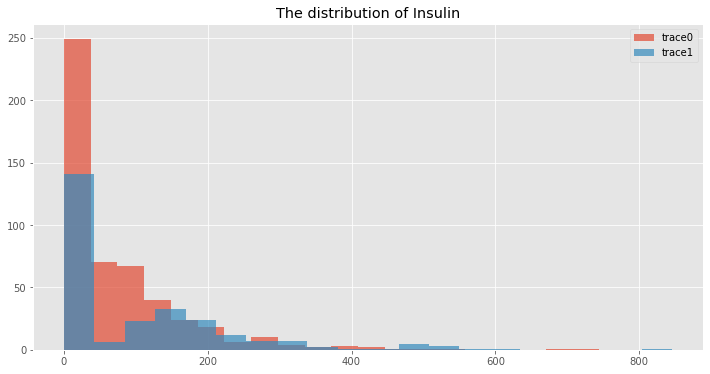

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


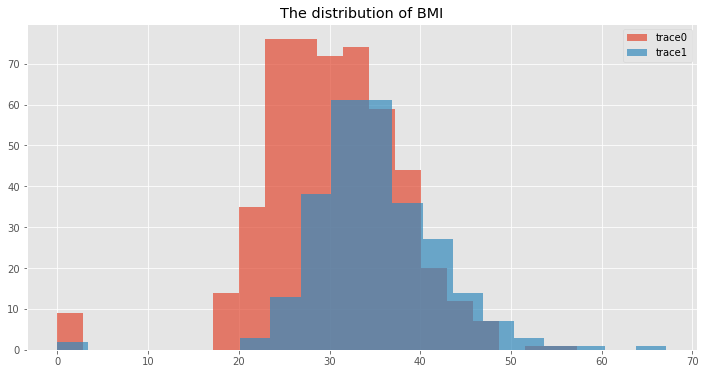

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


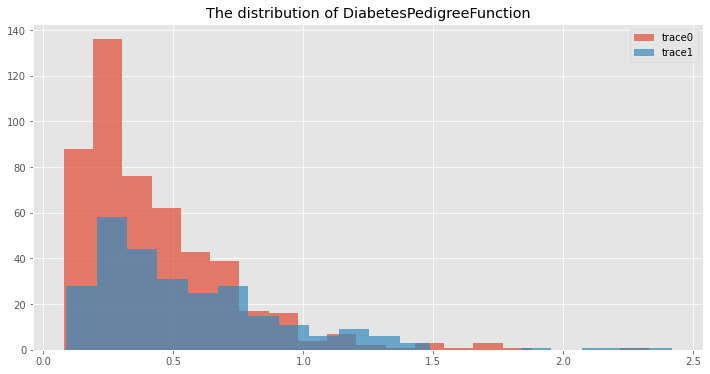

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


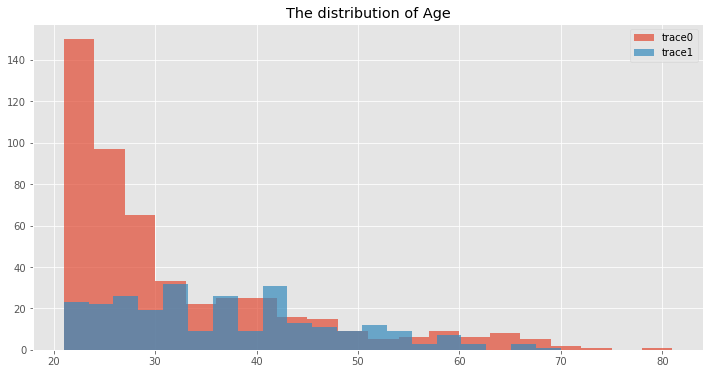

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [18]:
for i in range(0, 8):
    plotBarCat(df, df_name[i], 'Outcome')

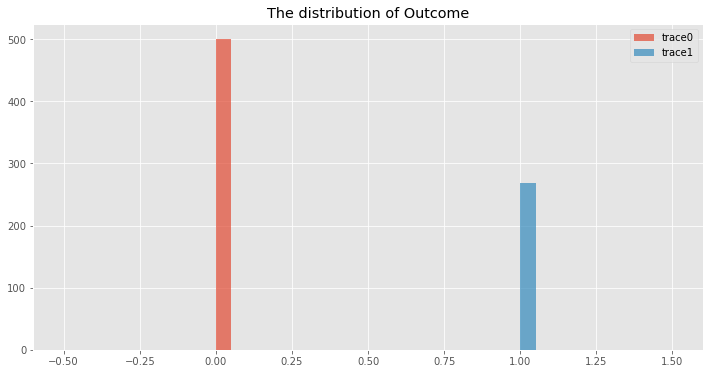

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [19]:
plotBarCat(df, df_name[8], 'Outcome')

<AxesSubplot:>

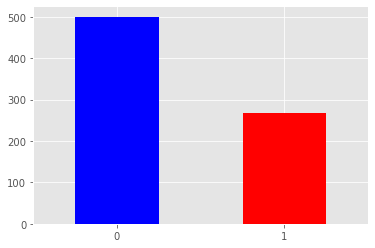

In [20]:
df['Outcome'].value_counts().plot(kind = 'bar' , rot = 0, color =  ['b', 'r'])

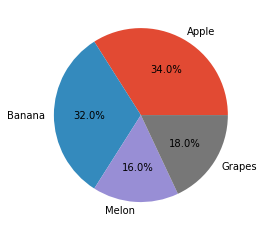

In [21]:
import matplotlib.pyplot as plt

ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

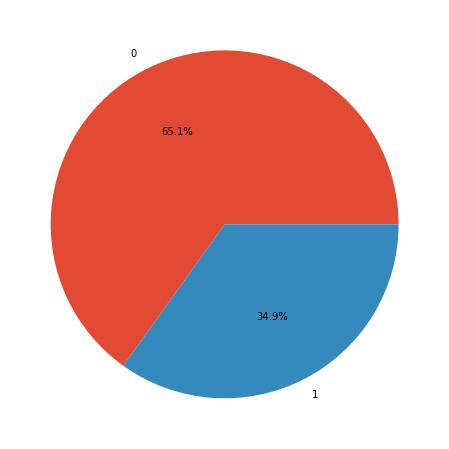

In [22]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.pie(df['Outcome'].value_counts(), labels=['0', '1'], autopct='%.1f%%')
plt.show()

In the case of classification problem we alwyas need to check the target distribution. If the distribution of target is not balance, we must treat our data more carefully. For example we can use several methods to resampling our data. We do not resampling our data in this kernel. In addition, we need to use stratified method in our validation in order to keep the same distribution in our train and test.

분류문제에서 타겟의 분포를 유심히 살펴야함. 타겟의 분포가 밸런스되어 있지 않으면 조심히 다뤄야함. 밸런스를 맞초기 위해 리샘플링을 쓸수도 있음. 여기서는 다루지 않음.
밸런스가 깨져있을 때는 validation 때도 깨어진 밸런스를 유지하면서 검증해야함

#### outlier 조사

In [23]:
df_name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
def BoxPlot(df, feature):
    fig, ax = plt.subplots(figsize = (12, 5))
    df[[feature]].boxplot(ax = ax)
    plt.title(feature+ ' outliers')
    plt.show()

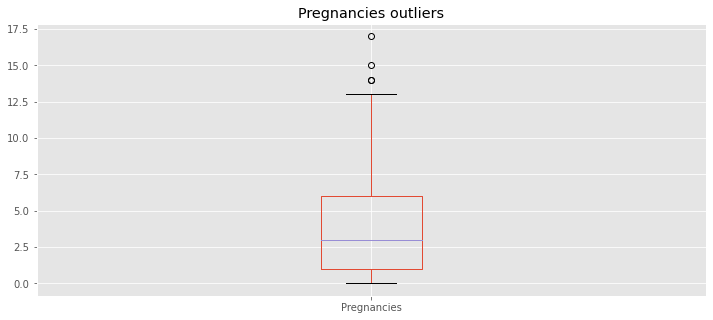

In [25]:
BoxPlot(df, df_name[0])

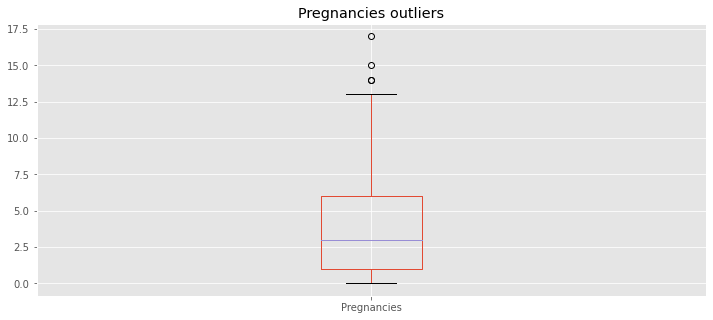

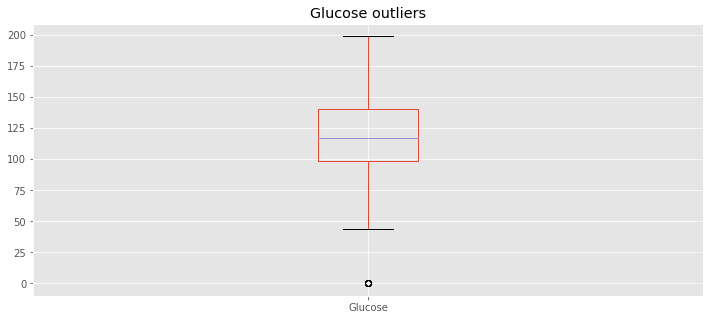

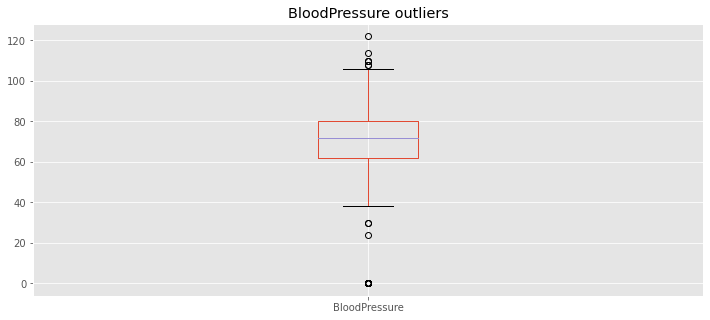

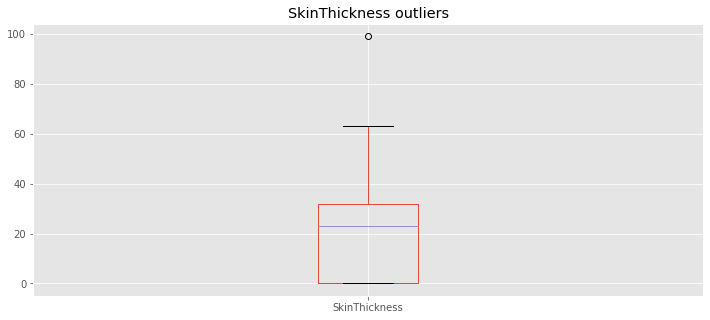

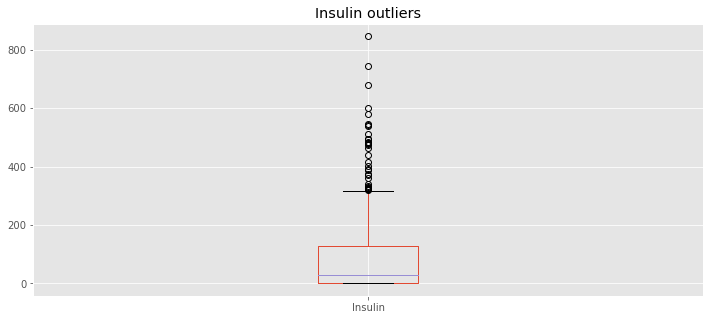

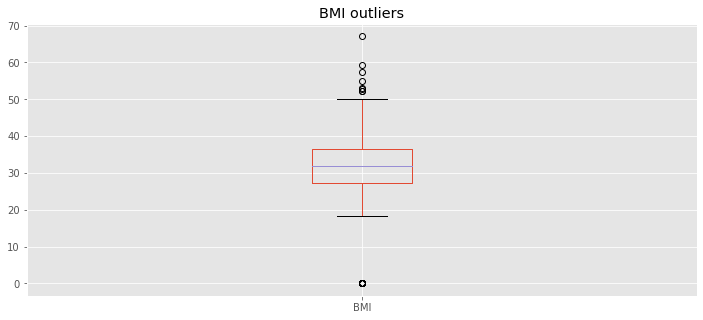

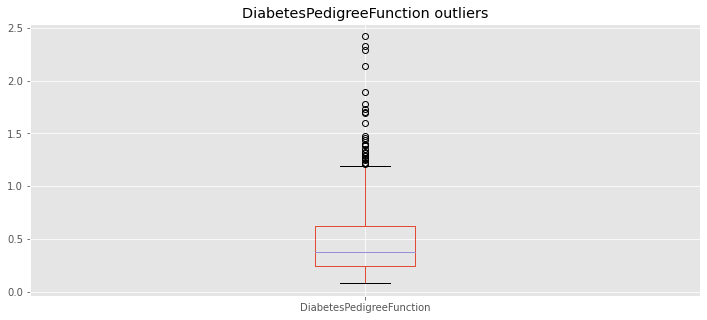

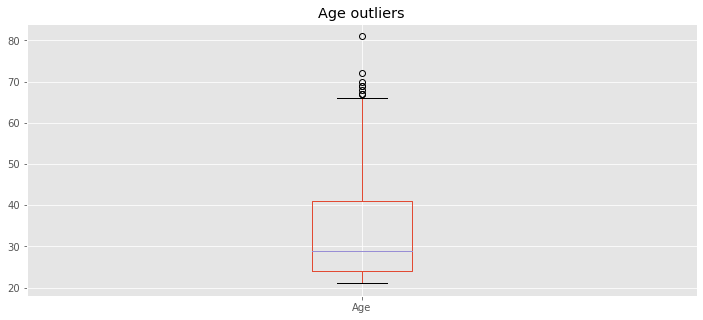

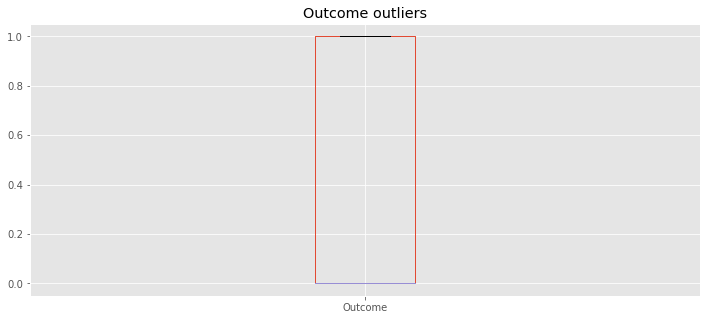

In [26]:
for name in df_name:
    BoxPlot(df, name)

#### Outliers investigation Pairs

In [27]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [28]:
def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}

    
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
 
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 76, 1: 692}


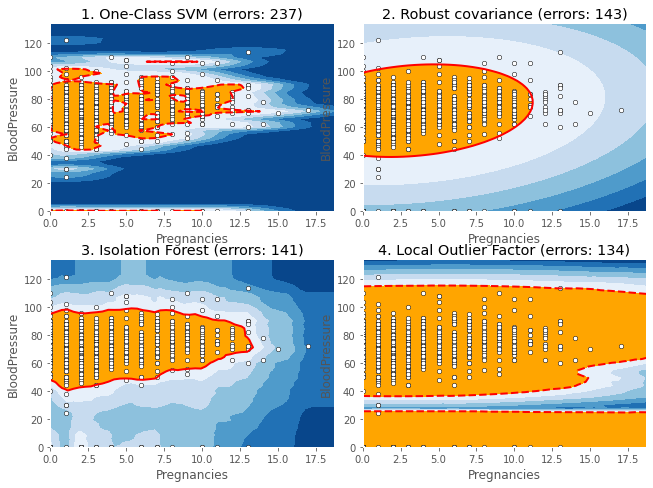

In [29]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

### Evaluate Algorithms: Baseline

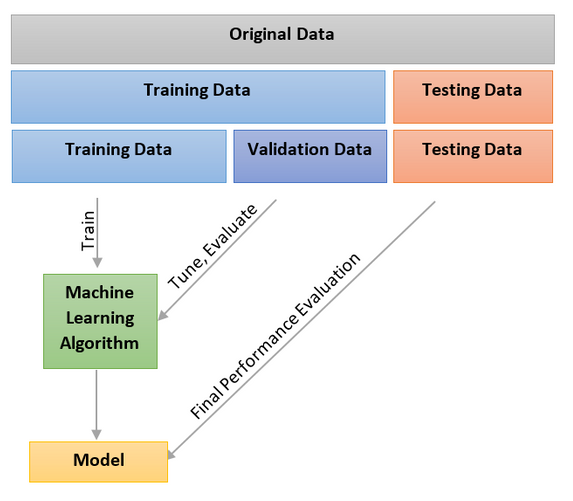

기존 방식은 테스트 결과에 대한 variance가 심했다. 이를 극복하기 위해 k-fold validation 기법을 사용하였다.

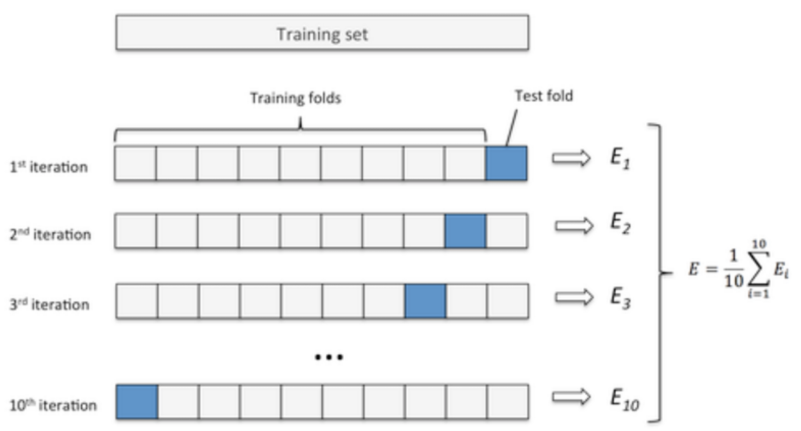

In [30]:
# Load libraries

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [32]:
X = df[df_name[0:8]]
y = df[df_name[8]]

In [33]:
display(X.head())
display(y.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [35]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [40]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [41]:
models = GetBasedModel()

In [42]:
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(probability=True)),
 ('AB', AdaBoostClassifier()),
 ('GBM', GradientBoostingClassifier()),
 ('RF', RandomForestClassifier()),
 ('ET', ExtraTreesClassifier())]

In [43]:
names, results = BasedLine2(X_train, y_train, models)

LR: 0.751724 (0.038203)
LDA: 0.760405 (0.033932)
KNN: 0.698004 (0.046531)
CART: 0.694404 (0.040603)
NB: 0.743103 (0.036788)
SVM: 0.743134 (0.041095)
AB: 0.755233 (0.054116)
GBM: 0.753600 (0.032727)
RF: 0.731034 (0.037927)
ET: 0.741289 (0.039284)


In [44]:
names

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'AB', 'GBM', 'RF', 'ET']

In [45]:
results

[array([0.74137931, 0.77586207, 0.75862069, 0.79310345, 0.75862069,
        0.68965517, 0.73684211, 0.68421053, 0.80701754, 0.77192982]),
 array([0.74137931, 0.75862069, 0.74137931, 0.77586207, 0.75862069,
        0.79310345, 0.71929825, 0.70175439, 0.80701754, 0.80701754]),
 array([0.74137931, 0.60344828, 0.70689655, 0.63793103, 0.68965517,
        0.75862069, 0.75438596, 0.68421053, 0.70175439, 0.70175439]),
 array([0.63793103, 0.67241379, 0.75862069, 0.65517241, 0.72413793,
        0.74137931, 0.64912281, 0.66666667, 0.71929825, 0.71929825]),
 array([0.74137931, 0.74137931, 0.68965517, 0.74137931, 0.72413793,
        0.79310345, 0.78947368, 0.68421053, 0.73684211, 0.78947368]),
 array([0.77586207, 0.75862069, 0.72413793, 0.77586207, 0.65517241,
        0.72413793, 0.71929825, 0.71929825, 0.77192982, 0.80701754]),
 array([0.67241379, 0.74137931, 0.77586207, 0.75862069, 0.75862069,
        0.81034483, 0.8245614 , 0.71929825, 0.8245614 , 0.66666667]),
 array([0.70689655, 0.72413793, 0.

In [58]:
def PlotBox(names, value):
    df = pd.DataFrame()
    for i in range(len(names)):
        df[names[i]] = value[i]
        
    fig, ax = plt.subplots(figsize = (12, 6))
    df.boxplot(ax = ax)

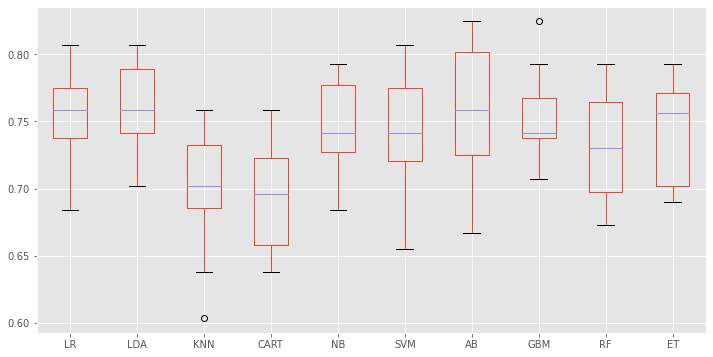

In [59]:
PlotBox(names, results)

In [60]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [61]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

,Model,Score
0,LR,0.7517
1,LDA,0.7604
2,KNN,0.6980
3,CART,0.6944
4,NB,0.7431
5,SVM,0.7431
6,AB,0.7552
7,GBM,0.7536
8,RF,0.7310
9,ET,0.7413


### Feature engineering

### 전처리

수치 전처리는 모델이 트리기반인지 아닌지에 따라서 다르다.

1) 통상적으로  
- Tree based models does not depend on scaling
- Non-tree based models hugely depend on scaling

2) 자주 사용되는 전처리 방법들  
- MinMax scaler to [0,1]
- Standard Scaler to mean = 0 and std =1
- Rank (We do not work on it in this data set)
- Using np.log(1+data), np.sqrt(data) and stats.boxcox(data) (for exp dependency)

전처리에 따라 예측결과어 어떻게 달라지는지 확인해보자.

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [63]:
def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

#### standard scalear

In [65]:
models = GetScaledModel('standard')

In [66]:
models

[('standardLR',
  Pipeline(steps=[('Scaler', StandardScaler()), ('LR', LogisticRegression())])),
 ('standardLDA',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('LDA', LinearDiscriminantAnalysis())])),
 ('standardKNN',
  Pipeline(steps=[('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])),
 ('standardCART',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('CART', DecisionTreeClassifier())])),
 ('standardNB',
  Pipeline(steps=[('Scaler', StandardScaler()), ('NB', GaussianNB())])),
 ('standardSVM',
  Pipeline(steps=[('Scaler', StandardScaler()), ('SVM', SVC())])),
 ('standardAB',
  Pipeline(steps=[('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])),
 ('standardGBM',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('GMB', GradientBoostingClassifier())])),
 ('standardRF',
  Pipeline(steps=[('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])),
 ('standardET',
  Pipeline(steps=[('Scaler', StandardScale

In [67]:
names,results = BasedLine2(X_train, y_train,models)

standardLR: 0.762160 (0.031231)
standardLDA: 0.760405 (0.033932)
standardKNN: 0.713612 (0.050130)
standardCART: 0.706443 (0.037992)
standardNB: 0.743103 (0.036788)
standardSVM: 0.755172 (0.025333)
standardAB: 0.755233 (0.054116)
standardGBM: 0.750091 (0.032454)
standardRF: 0.748397 (0.041818)
standardET: 0.743073 (0.024054)


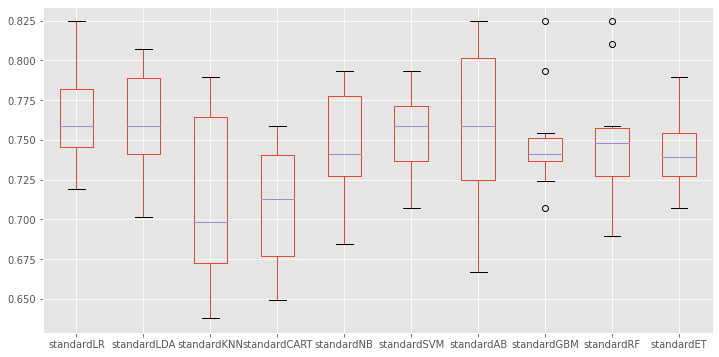

In [68]:
PlotBox(names, results)

In [69]:
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore, scaledScoreStandard], axis=1)
compareModels

,Model,Score,Model,Score
0,LR,0.7517,standardLR,0.7622
1,LDA,0.7604,standardLDA,0.7604
2,KNN,0.6980,standardKNN,0.7136
3,CART,0.6944,standardCART,0.7064
4,NB,0.7431,standardNB,0.7431
5,SVM,0.7431,standardSVM,0.7552
6,AB,0.7552,standardAB,0.7552
7,GBM,0.7536,standardGBM,0.7501
8,RF,0.7310,standardRF,0.7484
9,ET,0.7413,standardET,0.7431


#### MinMax

minmaxLR: 0.762129 (0.030495)
minmaxLDA: 0.760405 (0.033932)
minmaxKNN: 0.713612 (0.049576)
minmaxCART: 0.696189 (0.039556)
minmaxNB: 0.743103 (0.036788)
minmaxSVM: 0.770901 (0.031363)
minmaxAB: 0.755233 (0.054116)
minmaxGBM: 0.755324 (0.032491)
minmaxRF: 0.750060 (0.035134)
minmaxET: 0.746612 (0.036073)


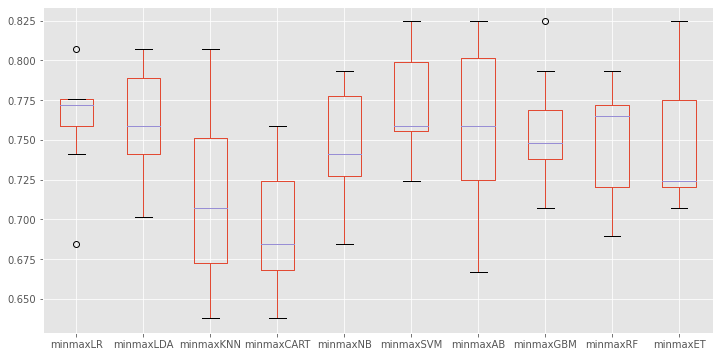

In [70]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBox(names, results)

In [71]:
scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore, scaledScoreStandard, scaledScoreMinMax], axis=1)
compareModels

,Model,Score,Model,Score,Model,Score
0,LR,0.7517,standardLR,0.7622,minmaxLR,0.7621
1,LDA,0.7604,standardLDA,0.7604,minmaxLDA,0.7604
2,KNN,0.6980,standardKNN,0.7136,minmaxKNN,0.7136
3,CART,0.6944,standardCART,0.7064,minmaxCART,0.6962
4,NB,0.7431,standardNB,0.7431,minmaxNB,0.7431
5,SVM,0.7431,standardSVM,0.7552,minmaxSVM,0.7709
6,AB,0.7552,standardAB,0.7552,minmaxAB,0.7552
7,GBM,0.7536,standardGBM,0.7501,minmaxGBM,0.7553
8,RF,0.7310,standardRF,0.7484,minmaxRF,0.7501
9,ET,0.7413,standardET,0.7431,minmaxET,0.7466


#### outlier 제거

In [88]:
df_t = df.copy()
df_t_name = df_t.columns

In [89]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

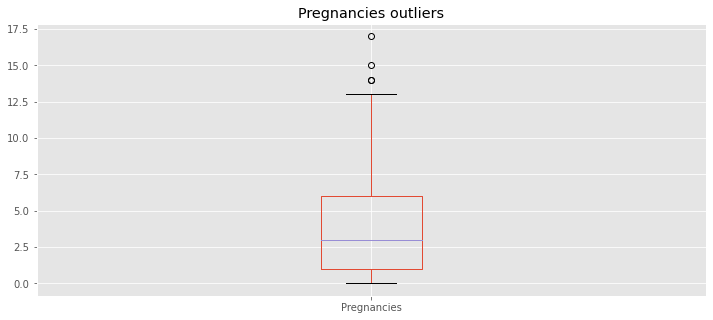

In [90]:
BoxPlot(df, df_name[0])

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.


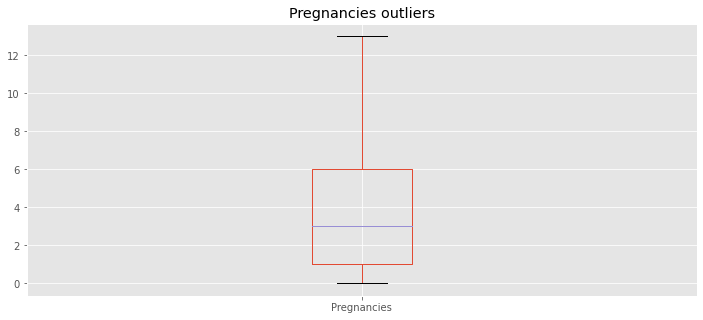

In [91]:
df_clean = TurkyOutliers(df_t,df_name[0],True)
BoxPlot(df_clean,df_name[0])

feature1

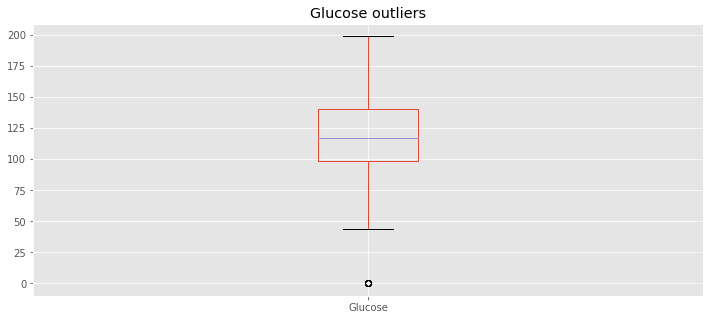

Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features each.


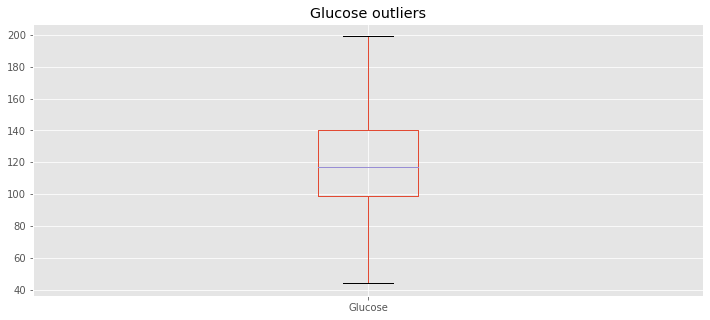

In [92]:
BoxPlot(df, df_name[1])
df_clean = TurkyOutliers(df_clean,df_name[1],True)
BoxPlot(df_clean,df_name[1])

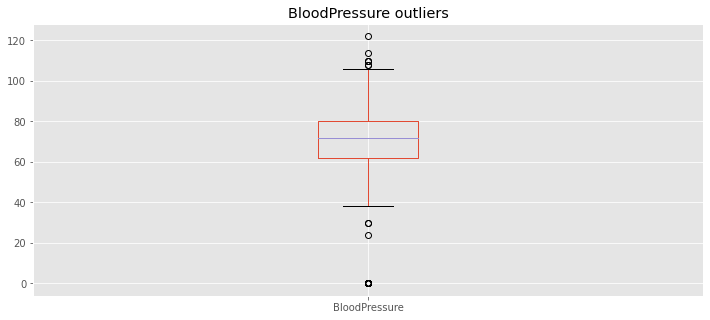

Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features each.


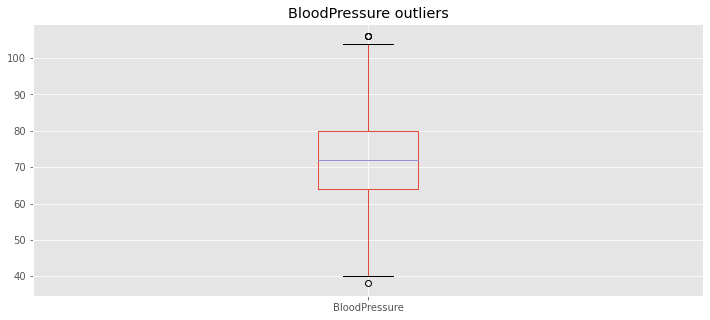

In [93]:
BoxPlot(df, df_name[2])
df_clean = TurkyOutliers(df_clean,df_name[2],True)
BoxPlot(df_clean,df_name[2])

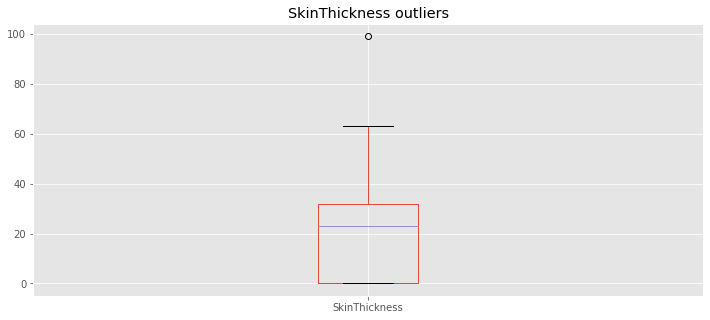

Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 713 samples with 9 features each.


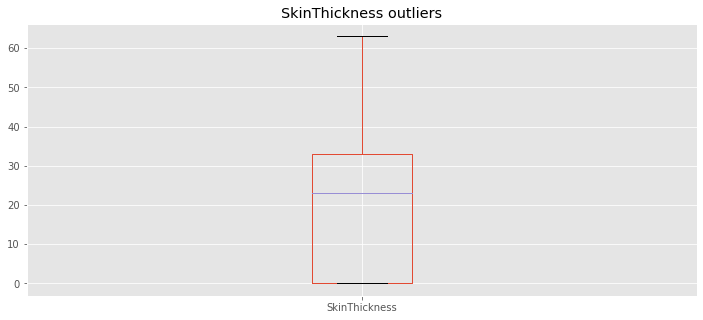

In [94]:
BoxPlot(df, df_name[3])
df_clean = TurkyOutliers(df_clean,df_name[3],True)
BoxPlot(df_clean,df_name[3])

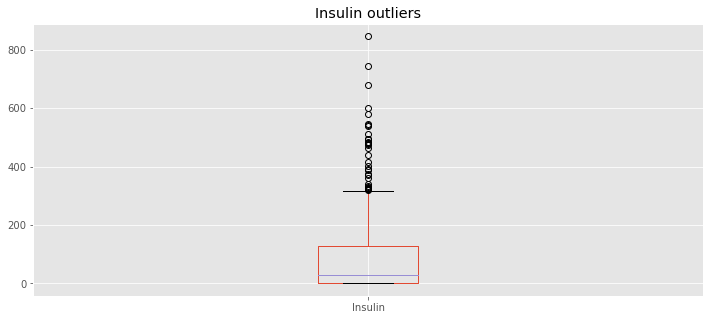

Number of outliers (inc duplicates): 27 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features each.


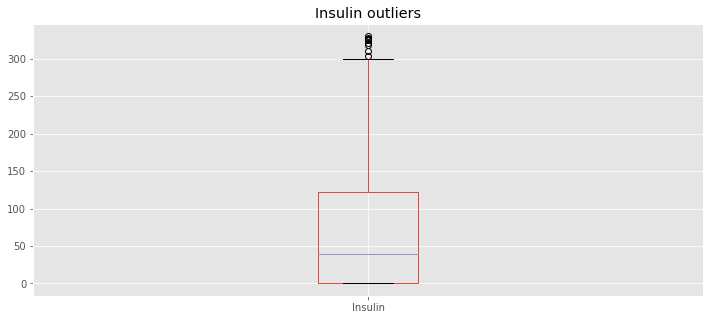

In [95]:
BoxPlot(df, df_name[4])
df_clean = TurkyOutliers(df_clean,df_name[4],True)
BoxPlot(df_clean,df_name[4])

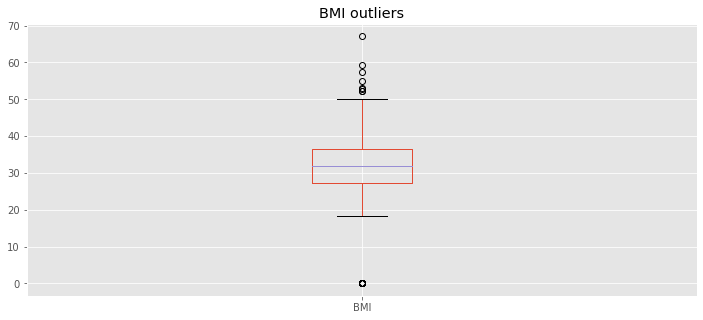

Number of outliers (inc duplicates): 10 and outliers: [ 0.  49.7 53.2  0.  50.  52.9  0.  59.4 57.3  0. ]
New dataset with removed outliers has 676 samples with 9 features each.


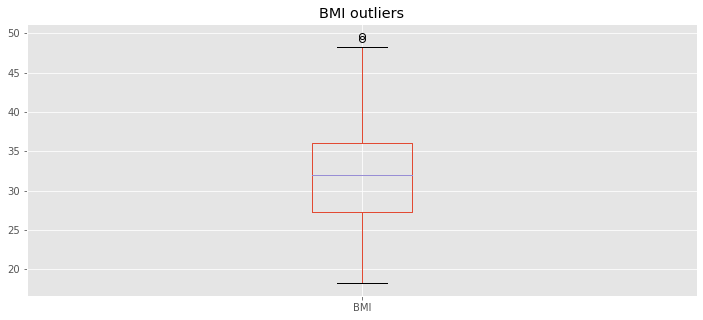

In [96]:
BoxPlot(df, df_name[5])
df_clean = TurkyOutliers(df_clean,df_name[5],True)
BoxPlot(df_clean,df_name[5])

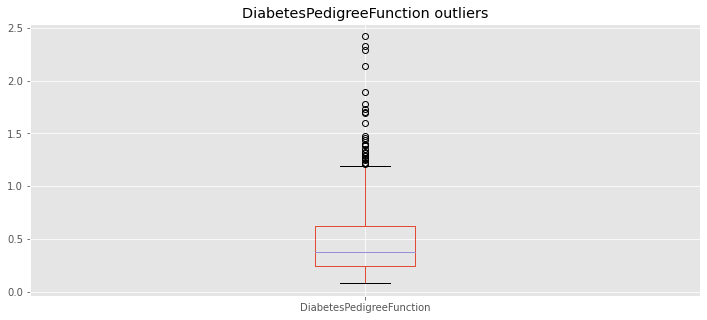

Number of outliers (inc duplicates): 29 and outliers: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.189 1.321 1.224 1.318 1.213
 1.353 1.224 1.391 1.476 1.268 1.6   1.191 1.251 1.699 1.258 1.282 1.698
 1.461 1.292 1.394 1.174 1.182]
New dataset with removed outliers has 647 samples with 9 features each.


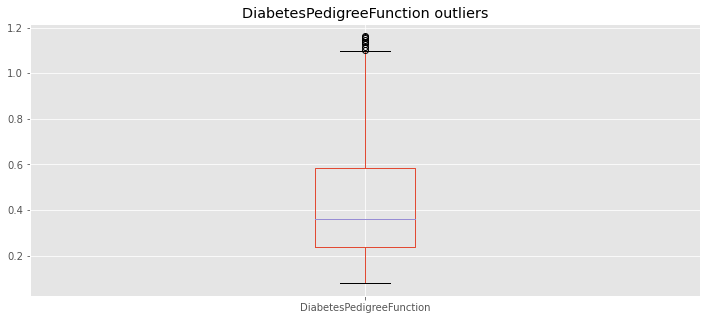

In [97]:
BoxPlot(df, df_name[6])
df_clean = TurkyOutliers(df_clean,df_name[6],True)
BoxPlot(df_clean,df_name[6])

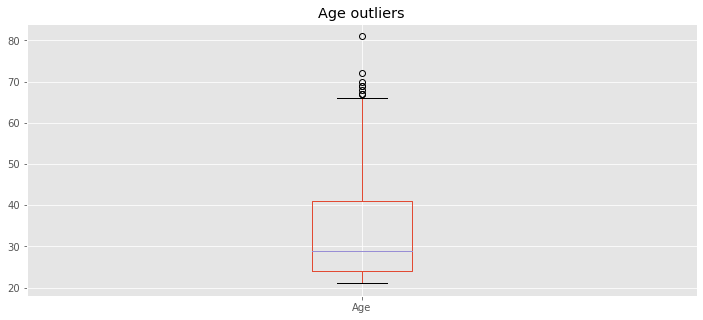

Number of outliers (inc duplicates): 11 and outliers: [69 66 67 81 67 66 67 66 70 68 66]
New dataset with removed outliers has 636 samples with 9 features each.


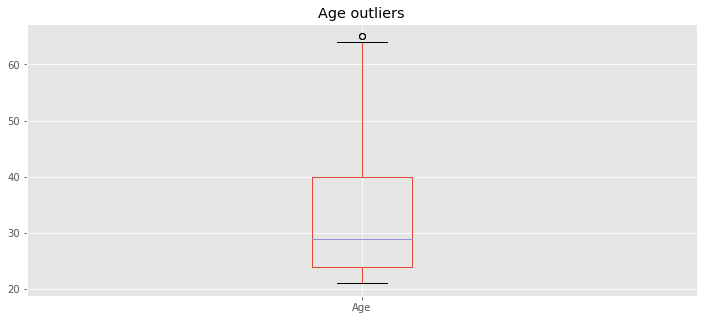

In [98]:
BoxPlot(df, df_name[7])
df_clean = TurkyOutliers(df_clean,df_name[7],True)
BoxPlot(df_clean,df_name[7])

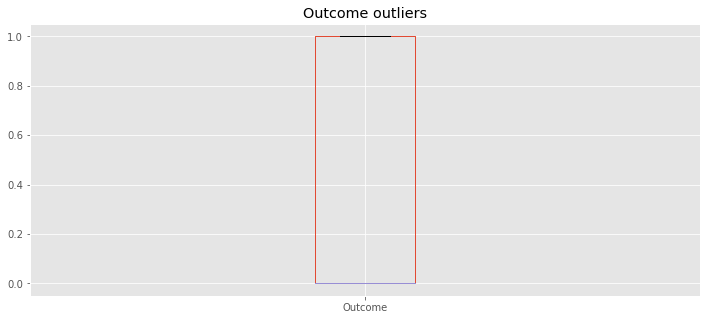

Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 636 samples with 9 features each.


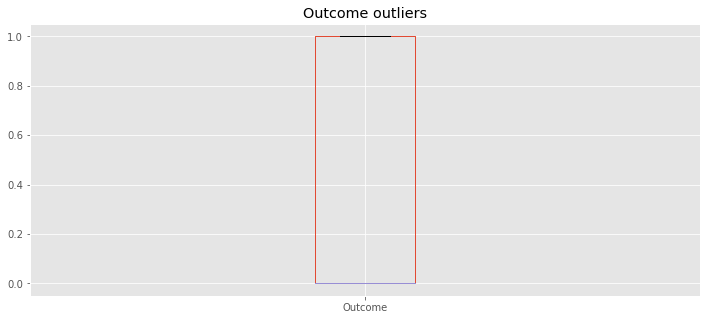

In [99]:
BoxPlot(df, df_name[8])
df_clean = TurkyOutliers(df_clean,df_name[8],True)
BoxPlot(df_clean,df_name[8])

In [100]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
631,10,101,76,48,180,32.9,0.171,63,0
632,2,122,70,27,0,36.8,0.340,27,0
633,5,121,72,23,112,26.2,0.245,30,0
634,1,126,60,0,0,30.1,0.349,47,1


cleaning report

In [101]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 768, new df shape: 636, we lost 132 rows, 17.1875% of our data


One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 76, 1: 692}


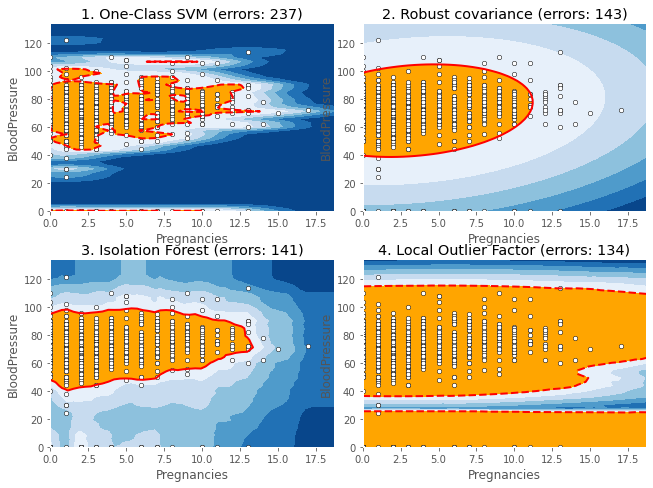

In [102]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

One-Class SVM {-1: 145, 1: 491}
Robust covariance {-1: 64, 1: 572}
Isolation Forest {-1: 64, 1: 572}
Local Outlier Factor {-1: 64, 1: 572}


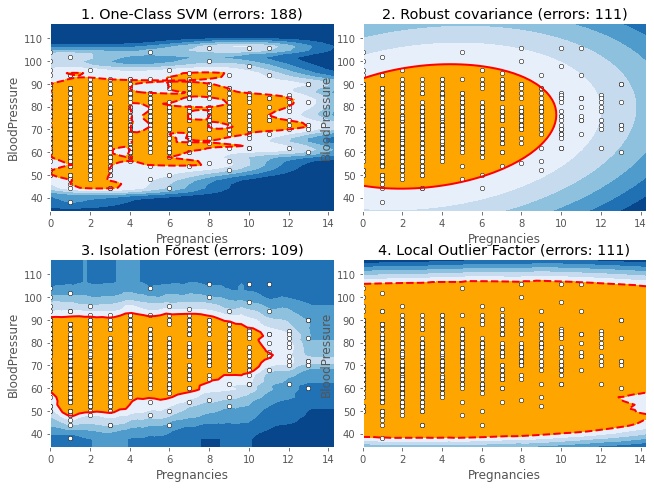

In [103]:
tt_t = OutLierDetection(df_clean,'Pregnancies','BloodPressure',.1)

#### clean 후에 모델 성능 비교

In [104]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:8]]
y_c = df_clean[df_clean_name[8]]

In [105]:
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c, y_c, test_size=0.25, 
                                                           random_state=0, stratify=y_c)

minmaxLR: 0.775798 (0.040042)
minmaxLDA: 0.782181 (0.044073)
minmaxKNN: 0.744105 (0.062750)
minmaxCART: 0.687855 (0.075763)
minmaxNB: 0.759131 (0.047747)
minmaxSVM: 0.763298 (0.040902)
minmaxAB: 0.712899 (0.031326)
minmaxGBM: 0.757048 (0.046726)
minmaxRF: 0.767642 (0.065954)
minmaxET: 0.756826 (0.057658)


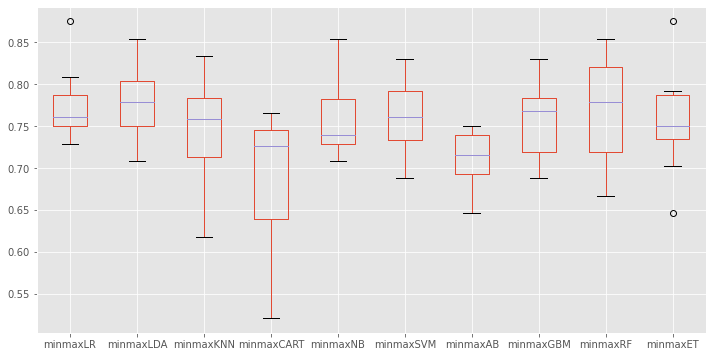

In [107]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBox(names,results)

In [108]:
scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)

In [109]:
compareModels

,Model,Score,Model,Score,Model,Score,Model,Score
0,LR,0.7517,standardLR,0.7622,minmaxLR,0.7621,minmaxLR,0.7758
1,LDA,0.7604,standardLDA,0.7604,minmaxLDA,0.7604,minmaxLDA,0.7822
2,KNN,0.6980,standardKNN,0.7136,minmaxKNN,0.7136,minmaxKNN,0.7441
3,CART,0.6944,standardCART,0.7064,minmaxCART,0.6962,minmaxCART,0.6879
4,NB,0.7431,standardNB,0.7431,minmaxNB,0.7431,minmaxNB,0.7591
5,SVM,0.7431,standardSVM,0.7552,minmaxSVM,0.7709,minmaxSVM,0.7633
6,AB,0.7552,standardAB,0.7552,minmaxAB,0.7552,minmaxAB,0.7129
7,GBM,0.7536,standardGBM,0.7501,minmaxGBM,0.7553,minmaxGBM,0.7570
8,RF,0.7310,standardRF,0.7484,minmaxRF,0.7501,minmaxRF,0.7676
9,ET,0.7413,standardET,0.7431,minmaxET,0.7466,minmaxET,0.7568


#### Feature Selection

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

상관도

In [110]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                          square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

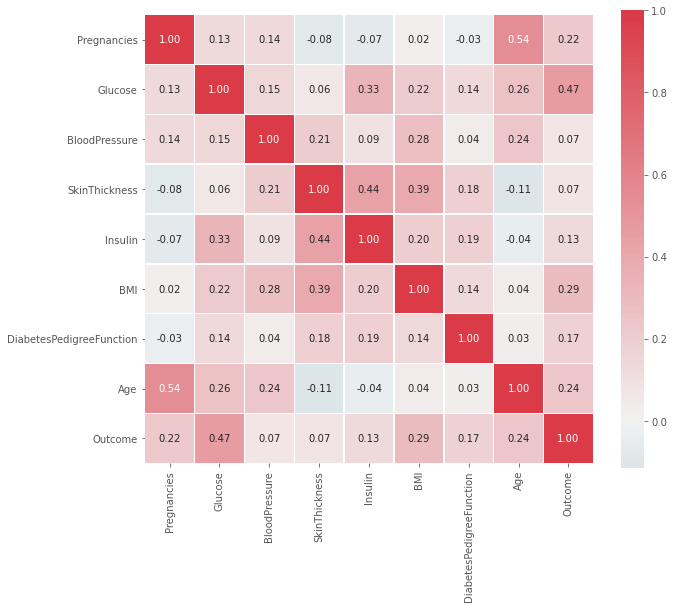

In [111]:
HeatMap(df,x=True)

feature importance

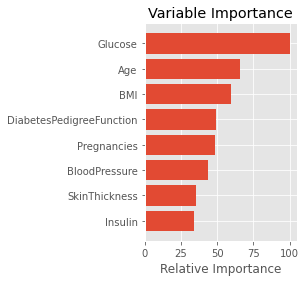

In [112]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

피처를 4가지로 축소

In [113]:
df_feature_imp=df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

In [114]:
df_feature_imp_name = df_feature_imp.columns

In [116]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]

X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,y, test_size=0.1, random_state=0, 
                                                               stratify=df_feature_imp['Outcome'])

In [117]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)

minmaxLR: 0.783424 (0.044573)
minmaxLDA: 0.781670 (0.043951)
minmaxKNN: 0.757108 (0.052171)
minmaxCART: 0.690442 (0.059777)
minmaxNB: 0.781730 (0.046205)
minmaxSVM: 0.790260 (0.034698)
minmaxAB: 0.755414 (0.041720)
minmaxGBM: 0.753600 (0.041090)
minmaxRF: 0.767604 (0.034130)
minmaxET: 0.772837 (0.036816)


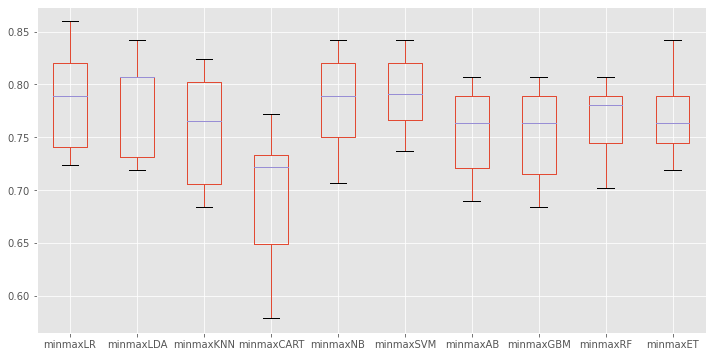

In [118]:
PlotBox(names,results)

In [119]:
scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

,Model,Score,Model,Score,Model,Score,Model,Score,Model,Score
0,LR,0.7517,standardLR,0.7622,minmaxLR,0.7621,minmaxLR,0.7758,minmaxLR,0.7834
1,LDA,0.7604,standardLDA,0.7604,minmaxLDA,0.7604,minmaxLDA,0.7822,minmaxLDA,0.7817
2,KNN,0.6980,standardKNN,0.7136,minmaxKNN,0.7136,minmaxKNN,0.7441,minmaxKNN,0.7571
3,CART,0.6944,standardCART,0.7064,minmaxCART,0.6962,minmaxCART,0.6879,minmaxCART,0.6904
4,NB,0.7431,standardNB,0.7431,minmaxNB,0.7431,minmaxNB,0.7591,minmaxNB,0.7817
5,SVM,0.7431,standardSVM,0.7552,minmaxSVM,0.7709,minmaxSVM,0.7633,minmaxSVM,0.7903
6,AB,0.7552,standardAB,0.7552,minmaxAB,0.7552,minmaxAB,0.7129,minmaxAB,0.7554
7,GBM,0.7536,standardGBM,0.7501,minmaxGBM,0.7553,minmaxGBM,0.7570,minmaxGBM,0.7536
8,RF,0.7310,standardRF,0.7484,minmaxRF,0.7501,minmaxRF,0.7676,minmaxRF,0.7676
9,ET,0.7413,standardET,0.7431,minmaxET,0.7466,minmaxET,0.7568,minmaxET,0.7728


### 알고리즘 튜닝

In [120]:
df_unscaled = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns

In [121]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)

X =  df_imp_scaled[:,0:4]
y =  df_imp_scaled[:,4]

X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,y, test_size=0.1, random_state=0, stratify=df_imp_scaled[:,4])

In [122]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [123]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model, self.hyperparameters, random_state=1, 
                                 n_iter=100, cv=cv, verbose=0, n_jobs=-1,)
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [124]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

#### logistic regression

In [125]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [126]:
hyperparameters

{'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x22b97011d30>,
 'penalty': ['l1', 'l2']}

In [129]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.786903 using {'C': 3.730229437354635, 'penalty': 'l2'}


In [130]:
Prediction_LR

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.])

In [131]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [132]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.828125


#### KNN

In [133]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [135]:
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [136]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))

Best: 0.809558 using {'n_neighbors': 15}
prediction on test set is: 0.828125
